In [1]:
# run from newev1


import numpy as np
import pandas as pd
import os
import matplotlib.ticker as mticker
import datetime as dt


In [2]:
path = os.getcwd()+'\\XLSDATA'

files = []
filespath = []
# r=root, d=directories, f = files
for r, d, f in os.walk(path):
    for file in f:
        if '.xls' in file:
            files.append(file)
            filespath.append(os.path.join(r, file))

In [3]:
xls = pd.read_excel('C:\\Users\\fpe\\--JUPYTER--\\3384_CPTu\\XLSDATA\840-3.xls', 'Data')

In [4]:
os.path.join(r, file)

'C:\\Users\\fpe\\--JUPYTER--\\3384_CPTu\\XLSDATA\\840-3.xls'

In [5]:
# e=0
# for file in files:
#     xlstemp = pd.read_excel(os.path.join(r, file), 'Data')
#     xlstemp['CPTname']=file.replace('.xls','')
#     e+=1
#     if e==1:
#         xls=xlstemp.copy()
#     if e>1:
#         xls.append(xlstemp, ignore_index = True, sort=True)
                

    

In [6]:
xls=pd.DataFrame({})
for file in files:
    try:
        xlstemp = pd.read_excel(os.path.join(r, file), 'Data')
        xlstemp['CPTname']=file.replace('.xls','')
        xls = xls.append(xlstemp, ignore_index = True, sort=True)
    except:
        print('A file was not loaded')

In [7]:
xls

,CPTname,Cone resistance (qc) in MPa,Corrected cone resistance (qt) in MPa,Depth [m],Dynamic pore pressure (u2) in MPa,Dynamic pore pressure ratio (u/qc) in MPa,Effective cone resistance (qe) in MPa,Effective vertical stress (rov;z`) in kPa,Equilibirum pore pressure (u0) in MPa,Equivalent SPT N60 Value,...,Sleeve friction (fs) in MPa,Soil Classification (avg. of Fr and Bq),Soil Classification (using Bq),Soil Classification (using Fr),Soil behaviour type index (Ic),Sounding speed in cm/s,Total force hydr (Qt) in kN,Total force mech (Qt) in kN,Total friction (Qst) in kN,Total vertical stress (rov;z) in kPa
0,1040,-0.0004,-0.0004,0.000000,0.0000,0.0000,-0.0004,0.21,0.0000,-0.0035,...,0.0,0.0,0.0,0.0,4.0,0.1000,11.3560,NaN,11.3564,0.21
1,1040,0.4913,0.4913,0.010000,0.0002,0.0003,0.4911,0.32,0.0001,4.4312,...,0.0,0.0,0.0,0.0,4.0,1.2048,5.7915,NaN,5.3002,0.42
2,1040,0.6268,0.6268,0.020000,0.0003,0.0005,0.6265,0.43,0.0002,5.6534,...,0.0,0.0,0.0,0.0,4.0,2.0833,6.5802,NaN,5.9534,0.63
3,1040,5.3926,5.3927,0.030000,0.0007,0.0001,5.3919,0.54,0.0003,48.6388,...,0.0,0.0,0.0,0.0,4.0,2.0000,10.1999,NaN,4.8073,0.84
4,1040,7.4444,7.4447,0.040000,0.0011,0.0002,7.4433,0.65,0.0004,67.1460,...,0.0,0.0,0.0,0.0,4.0,2.0833,12.4797,NaN,5.0353,1.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41310,840-3,3.8328,3.8327,3.239997,-0.0001,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,21.5235,NaN,17.6907,NaN
41311,840-3,11.0482,11.0483,3.249997,0.0009,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,30.5349,NaN,19.4867,NaN
41312,840-3,14.2852,14.2854,3.259997,0.0014,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,29.9622,NaN,15.6770,NaN
41313,840-3,15.2023,15.2025,3.269997,0.0013,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,31.6802,NaN,16.4779,NaN


In [8]:
groupedCPT=xls.groupby('CPTname').mean()

In [9]:
groupedCPT.index.sort

<bound method Index.sort of Index(['1040', '1060', '1080', '1100', '1120', '1140', '1160', '1180', '1200',
       '1220', '1240', '1260', '1280', '1300', '1320', '1340', '1360', '1380',
       '1400', '1420', '1440', '1440A', '1460', '1480', '1500', '1520', '1540',
       '1560', '1580', '1600', '1620', '1640', '1660', '1680', '1700', '1720',
       '1740', '1760', '1780', '1800', '1820 (0)', '20', '40', '60', '680-1',
       '680-2', '700-1', '700-2', '700-3', '720-1', '720-2', '720-3', '740-1',
       '740-2', '740-3', '760-1', '760-2', '760-3', '780-1', '780-2', '780-3',
       '800-1', '800-2', '800-3', '820-1', '820-2', '820-3', '840-1', '840-2',
       '840-3'],
      dtype='object', name='CPTname')>

In [10]:
str(dt.date.today())
nomefile= ".\\DATA\\" + (str(dt.date.today())) + "groupedCPT.csv"
export_csv = groupedCPT.to_csv (nomefile, header=True, sep=';')

In [11]:
descr_tab=xls.describe().iloc[:,:7]

In [12]:


namefile = 'descr_tab.xls'

str(dt.date.today())
nomefile= ".\\DATA\\" + (str(dt.date.today())) + namefile
export_csv = descr_tab.to_excel (nomefile, header=True)

In [13]:
def _l1(x):
    y=12.333*np.exp(-1.466*x)
    return y
def _l4(x):
    y=3.4258*np.exp(0.4778*x)
    return y
def _l5(x):
    y=7.3998*np.exp(0.6904*x)
    return y
def _l6(x):
    y=24.936*np.exp(0.9057*x)
    return y
def _l7(x):
    y=124.51*np.exp(1.9798*x)
    return y
def _l8(x):
    y=2033.1*np.power(x,-2.203)
    return y
def _l9(x):
    y=213.3*np.power(x,-0.589)
    return y
def _l89(x):
    y=0.01*np.exp(2.3026*x)
    return y

coeffma = 2.297409
coeffmm  = 1.969584
coeffmb = 1.709249


def _coeffm(x,y):   ## nota y input must be in kPa
    
    y=y/100  # from kPa -> bar
    x=x*100  # in %
    
    grad = np.degrees(np.arctan(np.log10(y/0.3556)/np.log10(10.149/x)))
    
    if grad>90:grad=90
    if grad<0: grad=0
    
    coeff = grad/np.degrees(np.arctan(coeffmm))
    
    return coeff


def _dr(qc,sv):
    
    # valid for qc,sv in kPa

    dre = 100*(0.268*np.log(qc/np.sqrt(sv*100))-0.675)
              
    if dre>100 : dre=100
    if dre<0 : dre=0
        
    return dre



def _classe(x,y):   ## nota y input must be in kPa
       
    classe=0
    
    y=y/100  # from kPa -> bar
    x=x*100  # in %
    
    if (y>0.001)&(y<_l1(x)):classe=1
    if (y>_l1(x))&(y<_l4(x))&(y<_l9(x)):classe=23
    if (y>_l4(x))&(y>_l1(x))&(y<_l5(x))&(y<_l9(x)):classe=4
    if (y>_l1(x))&(y>_l5(x))&(y<_l6(x))&(y<_l8(x)):classe=5
    if (y>_l1(x))&(y>_l6(x))&(y<_l7(x))&(y<_l8(x)):classe=6
    if (x>0.1)&(x<1.04)&(y>_l7(x)):classe=7
    if (y>_l8(x))&(y>_l89(x)):classe=8
    if (y>_l9(x))&(x>4)&(classe!=8):classe=9

    return int(classe)

In [14]:
####        INPUT DATA   ########################

density = 19 # in kPa

#################################################


df=pd.DataFrame({})
df['depth_m']=xls[[col for col in xls.columns if ('Depth' in col)][0]]                                                        
df['qc_kPa']=xls[[col for col in xls.columns if ('qc' in col)][0]]*1000
df['fs_kPa']=xls[[col for col in xls.columns if ('fs' in col)][0]]*1000

df['sv_kPa']=df.depth_m*density
df['qc_norm'] = df.qc_kPa-df.sv_kPa

df=df[(df > 0)]  ## escludi qualsiasi valore negativo

df['Q']=(df.qc_norm)              ### I need to plot qc/pa
df['F']=df.fs_kPa/(df.qc_norm)

df.dropna(how="any",inplace=True)

df=df[((df.qc_kPa!=0)&(df.fs_kPa!=0)&(df.Q!=0)&(df.F!=0))]


df=df.dropna(how="any")   ## elimina i nan
df[(df != 0)]             ## escludi qualsiasi valore uguale a 0
df=df[(df > 0)]           ## escludi qualsiasi valore negativo

# Applico le funzioni per travare le classi, consratio
df['type'] = df.apply(lambda x: _classe(x.F,x.Q), axis=1)
df['consratio'] = df.apply(lambda x: _coeffm(x.F,x.Q), axis=1)


#df[(df != 0)]              ## escludi qualsiasi valore uguale a 0
df=df[(df > 0)]             ## escludi qualsiasi valore negativo
df=df.dropna(how="any")     ## elimina i nan

df['type'] = df['type'].astype(int)

#df =df.iloc[:500,:]    ## riduco per trovare dove è l'errore


In [15]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(122,projection='3d')
ax2 = fig.add_subplot(121)

xs=df.F*100   ### express in %
ys=df.Q/100   ### express in bar 
zs=df.depth_m

colmap = cm.ScalarMappable(cmap=cm.hsv)
colmap.set_array(zs)

ax.scatter(np.log10(xs), np.log10(ys), zs, c=cm.hsv(zs/max(zs)), marker='o', edgecolors='b')
ax2.scatter(xs, ys,c=cm.hsv(zs/max(zs)), marker='o', edgecolors='b')

ax.set_xlabel('Log F (%)'),ax.set_ylabel('Log Q (kPa)'),ax.set_zlabel('Depth (m)')
ax.invert_zaxis()
ax2.set_xlabel('Log F (%)'),ax2.set_ylabel('Log Q (kPa)')

cb = fig.colorbar(colmap)

##  settaggi che valgono solo per il grafico 2D
plt.yscale("log")
plt.xscale("log")
plt.ylim((1,1000))
plt.xlim((0.1,100))

plt.show()

<Figure size 1500x600 with 3 Axes>

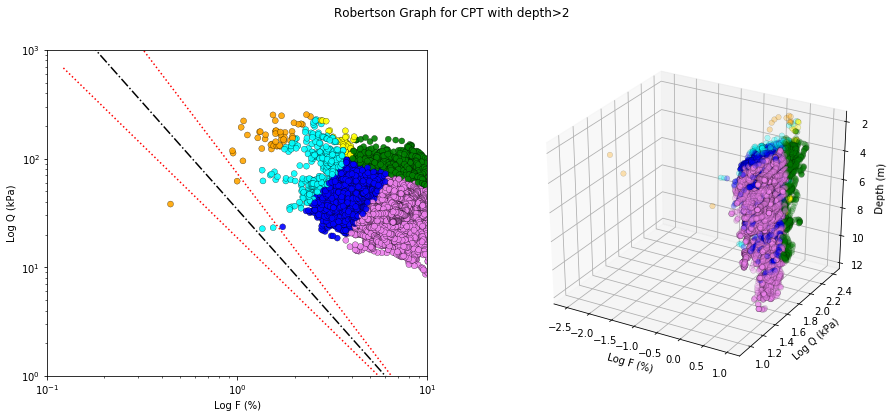

In [482]:
fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(122,projection='3d')
ax2 = fig.add_subplot(121)

dfa=df[df.depth_m>2].copy()      ###---> .copy()mi evita il warning fastidioso

xs=dfa.F*100   ### express in %
ys=dfa.Q/100   ### express in bar 
zs=dfa.depth_m

color_dict={1:'Palegreen',23:'Violet',4:'Blue',5:'Cyan',6:'Orange',7:'Red',
            8:'Yellow',9:'Green'}
dfa['colors'] = dfa['type'].map(lambda x: color_dict[x])

ax.scatter(np.log10(xs), np.log10(ys), zs, color=dfa['colors'], marker='o',edgecolors='Black',
           alpha=0.3, linewidths=0.3,s=30)
ax2.scatter(xs, ys,color=dfa['colors'], marker='o',edgecolors='Black',alpha=0.9, linewidths=0.3)
#   volendo aggiungi edgecolors='b'   al grafico

ax.set_xlabel('Log F (%)'),ax.set_ylabel('Log Q (kPa)'),ax.set_zlabel('Depth (m)')
ax2.set_xlabel('Log F (%)'),ax2.set_ylabel('Log Q (kPa)') 

x3 = [10.149,0.32]
x4 = [10.149,0.18]
x5 = [10.149,0.12]
y3 = [0.3556,1000]
y4 = [0.3556,1000]
y5 = [0.3556,700]

ax2.plot(x3,y3,':r')
ax2.plot(x4,y4,'-.k')
ax2.plot(x5,y5,':r')

ax.invert_zaxis()

##  settaggi che valgono solo per il grafico 2D
plt.yscale("log")
plt.xscale("log")
plt.ylim((1,1000))
plt.xlim((0.1,10))

fig.suptitle('Robertson Graph for CPT with depth>2')


plt.show()

In [ ]:
###  Plot of the graph for depth >2


fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(122,projection='3d')
ax2 = fig.add_subplot(121)

xs=df.F*100   ### express in %
ys=df.Q/100   ### express in bar 
zs=df.depth_m

color_dict={1:'Palegreen',23:'Violet',4:'Blue',5:'Cyan',6:'Orange',7:'Red',
            8:'Yellow',9:'Green'}
df['colors'] = df['type'].map(lambda x: color_dict[x])

ax.scatter(np.log10(xs), np.log10(ys), zs, color=df['colors'], marker='o',edgecolors='Black',
           alpha=0.3, linewidths=0.3,s=30)
ax2.scatter(xs, ys,color=df['colors'], marker='o',edgecolors='Black',alpha=0.9, linewidths=0.3)
#   volendo aggiungi edgecolors='b'   al grafico

ax.set_xlabel('Log F (%)'),ax.set_ylabel('Log Q (kPa)'),ax.set_zlabel('Depth (m)')
ax2.set_xlabel('Log F (%)'),ax2.set_ylabel('Log Q (kPa)') 

x3 = [10.149,0.32]
x4 = [10.149,0.18]
x5 = [10.149,0.12]
y3 = [0.3556,1000]
y4 = [0.3556,1000]
y5 = [0.3556,700]

ax2.plot(x3,y3,':r')
ax2.plot(x4,y4,'-.k')
ax2.plot(x5,y5,':r')

ax.invert_zaxis()

##  settaggi che valgono solo per il grafico 2D
plt.yscale("log")
plt.xscale("log")
plt.ylim((1,1000))
plt.xlim((0.1,10))

plt.show()

In [279]:
###        creazione di colonna solo con i numeri della sezione corrispondente   ####

df['cptname']=xls.iloc[df.index.tolist(),:].CPTname
df['cpt_sect_num']=df['cptname'].apply(lambda x: int(re.findall('\d+', x)[0]))


df.tail(3)


,depth_m,qc_kPa,fs_kPa,sv_kPa,qc_norm,Q,F,type,consratio,colors,constype,cptname,cpt_sect_num
41305,3.189997,3356.6,75.9,60.609943,3295.990057,3295.990057,0.023028,4,1.139265,Blue,over,840-3,840
41306,3.199997,3391.4,78.9,60.799943,3330.600057,3330.600057,0.023689,4,1.145012,Blue,over,840-3,840
41307,3.209997,3449.5,64.0,60.989943,3388.510057,3388.510057,0.018887,5,1.105644,Cyan,over,840-3,840


In [18]:
def _constype(x):
    
    x1='normal'
    
    if x < 0.92: x1='under'
    if x > 1.10: x1='over'
    
    return x1

df['constype'] = df.consratio.map( lambda x: _constype(x))
df['constype'] = df['constype'].astype('category')

print('Depth statistic for each consolidation type')
df.groupby("constype")['depth_m'].describe().reset_index()

Depth statistic for each consolidation type


,constype,count,mean,std,min,25%,50%,75%,max
0,normal,671.0,0.407466,0.604847,0.04,0.110000,0.180000,0.590000,6.080044
1,over,38623.0,3.342086,2.264444,0.06,1.569999,2.989998,4.630011,11.730170
2,under,239.0,0.235900,0.624577,0.02,0.050000,0.070000,0.110000,6.080044


In [19]:
df.groupby('constype')[['depth_m','qc_kPa','fs_kPa']].describe()

depth_m                                                          \
            count      mean       std   min       25%       50%       75%   
constype                                                                    
normal      671.0  0.407466  0.604847  0.04  0.110000  0.180000  0.590000   
over      38623.0  3.342086  2.264444  0.06  1.569999  2.989998  4.630011   
under       239.0  0.235900  0.624577  0.02  0.050000  0.070000  0.110000   

                      qc_kPa               ...                     fs_kPa  \
                max    count         mean  ...      75%      max    count   
constype                                   ...                              
normal     6.080044    671.0  5876.715946  ...  6941.55  28463.7    671.0   
over      11.730170  38623.0  4631.671349  ...  5400.80  31445.7  38623.0   
under      6.080044    239.0  3194.707531  ...  4785.20   7742.9    239.0   

                                                                       
                mean         std   min     25%    50%     75%     max  
constype                                                               
normal     58.753800   25.642233  12.3   39.50   55.9   73.50   218.4  
over      260.348564  119.167601  39.6  173.30  243.0  321.85  1094.0  
under       9.647280    6.517383   0.1    4.25    8.5   15.10    26.4  

[3 rows x 24 columns]

In [20]:
df['constype'] = df['constype'].astype('category')
df['constype'] = pd.Categorical(df['constype'], categories=["normal", "under", "over"], ordered=True)
grco=df.groupby("constype")['constype'].describe().reset_index()[['constype','count']]
dfgrco = pd.DataFrame(grco)
dfgrco['count'].astype('int')
dfgrco['percent']=dfgrco['count']/dfgrco['count'].sum()
dfgrco

,constype,count,percent
0,normal,671,0.0169732
1,under,239,0.00604558
2,over,38623,0.976981


In [21]:
#########   EXPORT TABLE

namefile = 'count-cons-type.xls'

str(dt.date.today())
nomefile= ".\\DATA\\" + (str(dt.date.today())) + namefile
export_csv = dfgrco.to_excel (nomefile, header=True)         #<----- inserire nome df corretto

In [22]:
import pandas as pd, numpy as np, random
import matplotlib.pyplot as plt, matplotlib.cm as cm
from mpl_toolkits.mplot3d import Axes3D
import IPython.display as IPdisplay
import glob
from PIL import Image as PIL_Image
from images2gif import writeGif
import pynamical
from pynamical import simulate, phase_diagram_3d
import pynamical
from pynamical import simulate, phase_diagram_3d
import pandas as pd, numpy as np, matplotlib.pyplot as plt, random, glob, os, IPython.display as IPdisplay
from PIL import Image
%matplotlib inline
import os

In [23]:
# set a filename, run the logistic model, and create the plot

save_folder = 'images/phase-animate_3'
gif_filename = '03-pan-rotate-zoom-demo'

working_folder = '{}/{}'.format(save_folder, gif_filename)

if not os.path.exists(working_folder):
    os.makedirs(working_folder)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# load data

ax.scatter(np.log10(xs), np.log10(ys), zs, 
           color=df['colors'], marker='o',edgecolors='Black',
           alpha=0.3, linewidths=0.3,s=30)

ax.invert_zaxis()
ax.set_xlabel('Log F (%)'),ax.set_ylabel('Log Q (kPa)'),ax.set_zlabel('Depth (m)')

# create 36 frames for the animated gif
steps = 10       ################

for azimuth in range(0, 360):
    ax.view_init(30, azimuth)
    
    # set the figure title to the viewing perspective, and save each figure as a .png
    #fig.suptitle('elev={:.1f}, angle={:.1f}, dist={:.1f}'.format(ax.view_init[0], ax.view_init[1], 50))
    plt.savefig('{}/{}/img{:03d}.png'.format(save_folder, gif_filename, azimuth))
    
# don't display the static plot...
plt.close()

# load all the static images into a list then save as an animated gif
gif_filepath = '{}/{}.gif'.format(save_folder, gif_filename)
images = [Image.open(image) for image in glob.glob('{}/*.png'.format(working_folder))]
gif = images[0]
gif.info['duration'] = 75 #milliseconds per frame
gif.info['loop'] = 0 #how many times to loop (0=infinite)
gif.save(fp=gif_filepath, format='gif', save_all=True, append_images=images[1:])
IPdisplay.Image(url=gif_filepath)


In [24]:
df_sandy = df[(df.type==5)|(df.type==6)|(df.type==7)|(df.type==8)].copy()
df_sandy['dr'] = df_sandy.apply(lambda x: _dr(x.qc_kPa,x.sv_kPa), axis=1)
df_sandy.tail()

,depth_m,qc_kPa,fs_kPa,sv_kPa,qc_norm,Q,F,type,consratio,colors,constype,dr
41091,1.049999,6043.4,162.8,19.949981,6023.450019,6023.450019,0.027028,5,1.197546,Cyan,over,64.021613
41092,1.059999,6387.9,169.1,20.139981,6367.760019,6367.760019,0.026556,5,1.197006,Cyan,over,65.380357
41093,1.069999,6430.5,180.8,20.329981,6410.170019,6410.170019,0.028205,5,1.207194,Cyan,over,65.432667
41094,1.079999,6418.9,189.0,20.519981,6398.380019,6398.380019,0.029539,5,1.214752,Cyan,over,65.259626
41307,3.209997,3449.5,64.0,60.989943,3388.510057,3388.510057,0.018887,5,1.105644,Cyan,over,34.019606


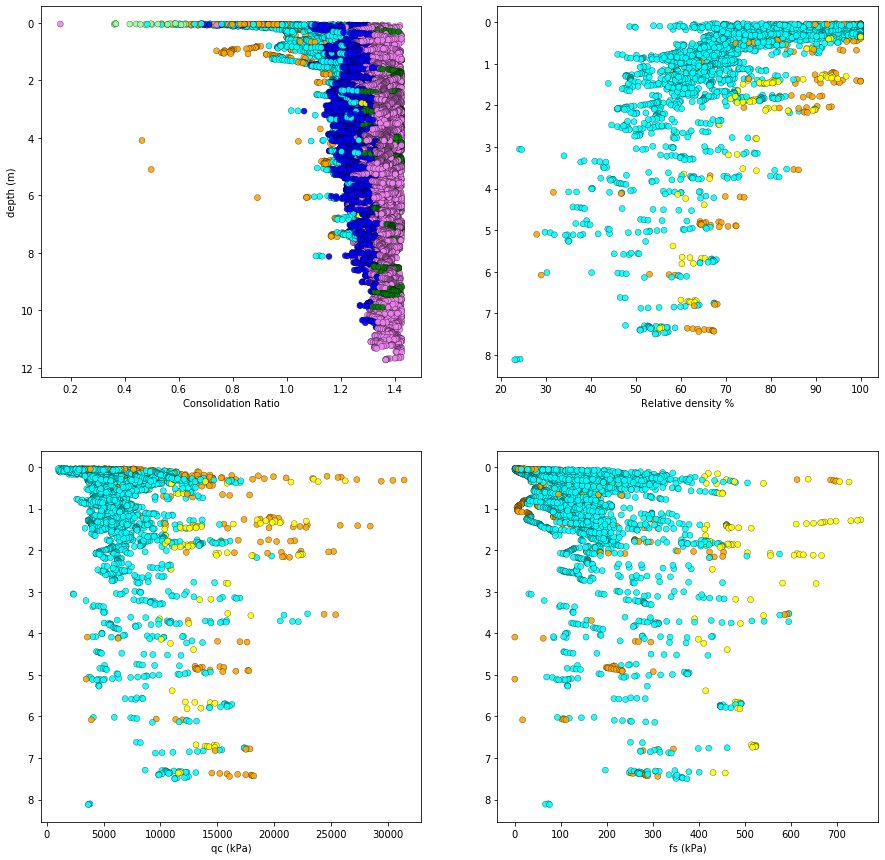

In [25]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)


x1=df.consratio
x2=df_sandy.dr 
x3=df_sandy.qc_kPa 
x4=df_sandy.fs_kPa 

zs=df.depth_m
zs_sandy=df_sandy.depth_m

color_dict={1:'Palegreen',23:'Violet',4:'Blue',5:'Cyan',6:'Orange',7:'Red',
            8:'Yellow',9:'Green'}

df_sandy['colors'] = df_sandy['type'].map(lambda x: color_dict[x])
df['colors'] = df['type'].map(lambda x: color_dict[x])

ax.scatter(x1, zs,color=df['colors'], marker='o',edgecolors='Black',alpha=0.9, linewidths=0.3)
ax2.scatter(x2, zs_sandy,color=df_sandy['colors'], marker='o',edgecolors='Black',alpha=0.9, linewidths=0.3)
ax3.scatter(x3, zs_sandy,color=df_sandy['colors'], marker='o',edgecolors='Black',alpha=0.9, linewidths=0.3)
ax4.scatter(x4, zs_sandy,color=df_sandy['colors'], marker='o',edgecolors='Black',alpha=0.9, linewidths=0.3)


ax.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()
ax4.invert_yaxis()

ax.set_xlabel('Consolidation Ratio'),ax.set_ylabel('depth (m)')
ax2.set_xlabel('Relative density %'),ax.set_ylabel('depth (m)')
ax3.set_xlabel('qc (kPa)'),ax.set_ylabel('depth (m)')
ax4.set_xlabel('fs (kPa)'),ax.set_ylabel('depth (m)')

plt.show()

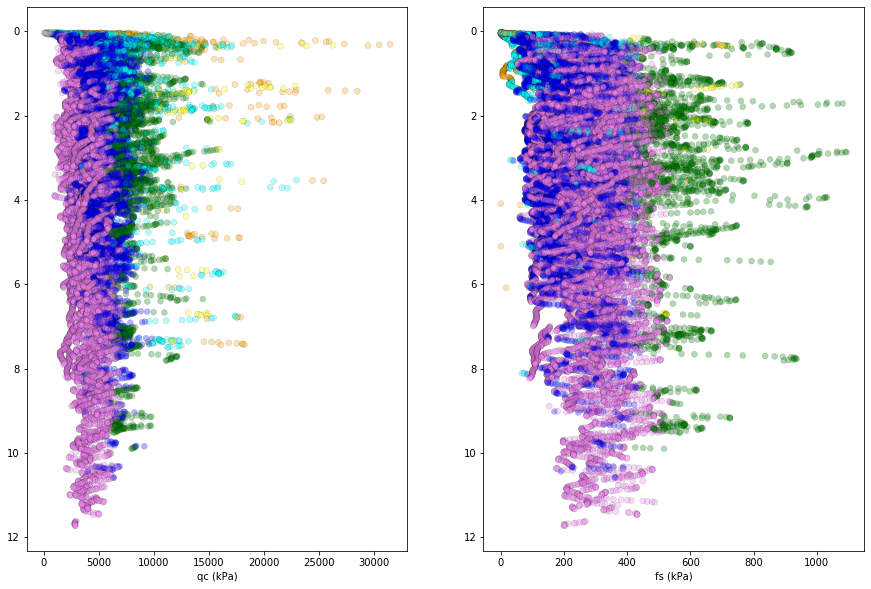

In [26]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,10))

ax3 = fig.add_subplot(121)
ax4 = fig.add_subplot(122)


x3=df.qc_kPa 
x4=df.fs_kPa 

zs=df.depth_m
zs_sandy=df_sandy.depth_m

color_dict={1:'Palegreen',23:'Violet',4:'Blue',5:'Cyan',6:'Orange',7:'Red',
            8:'Yellow',9:'Green'}

df['colors'] = df['type'].map(lambda x: color_dict[x])

ax3.scatter(x3, zs,color=df['colors'], marker='o',edgecolors='Black',alpha=0.3, linewidths=0.3)
ax4.scatter(x4, zs,color=df['colors'], marker='o',edgecolors='Black',alpha=0.3, linewidths=0.3)

ax3.invert_yaxis()
ax4.invert_yaxis()

ax3.set_xlabel('qc (kPa)'),ax.set_ylabel('depth (m)')
ax4.set_xlabel('fs (kPa)'),ax.set_ylabel('depth (m)')

plt.show()

In [27]:
#################        DEFINE CONSOLIDATION   LIMIT LINE   ####################

nc_limit=1             # 1 MEANS THAT EVERYTHING BELOW THE MIDDLE LINE IS CONSIDERED UNDER CONSOLIDATED



In [28]:
df_uncons = df[(df.consratio<nc_limit)].copy()
df_uncons['dr'] = df_uncons.apply(lambda x: _dr(x.qc_kPa,x.sv_kPa), axis=1)
df_uncons.tail()

,depth_m,qc_kPa,fs_kPa,sv_kPa,qc_norm,Q,F,type,consratio,colors,constype,dr
40333,0.05,6489.9,36.4,0.95,6488.95,6488.95,0.005610,6,0.965739,Orange,normal,100.000000
40662,0.05,3825.0,15.2,0.95,3824.05,3824.05,0.003975,6,0.876519,Orange,under,92.559658
40663,0.06,3298.5,30.5,1.14,3297.36,3297.36,0.009250,5,0.984897,Cyan,normal,86.147720
40991,0.05,2923.0,14.0,0.95,2922.05,2922.05,0.004791,5,0.876583,Cyan,under,85.351852
40992,0.06,2830.0,28.0,1.14,2828.86,2828.86,0.009898,5,0.982740,Cyan,normal,82.042198


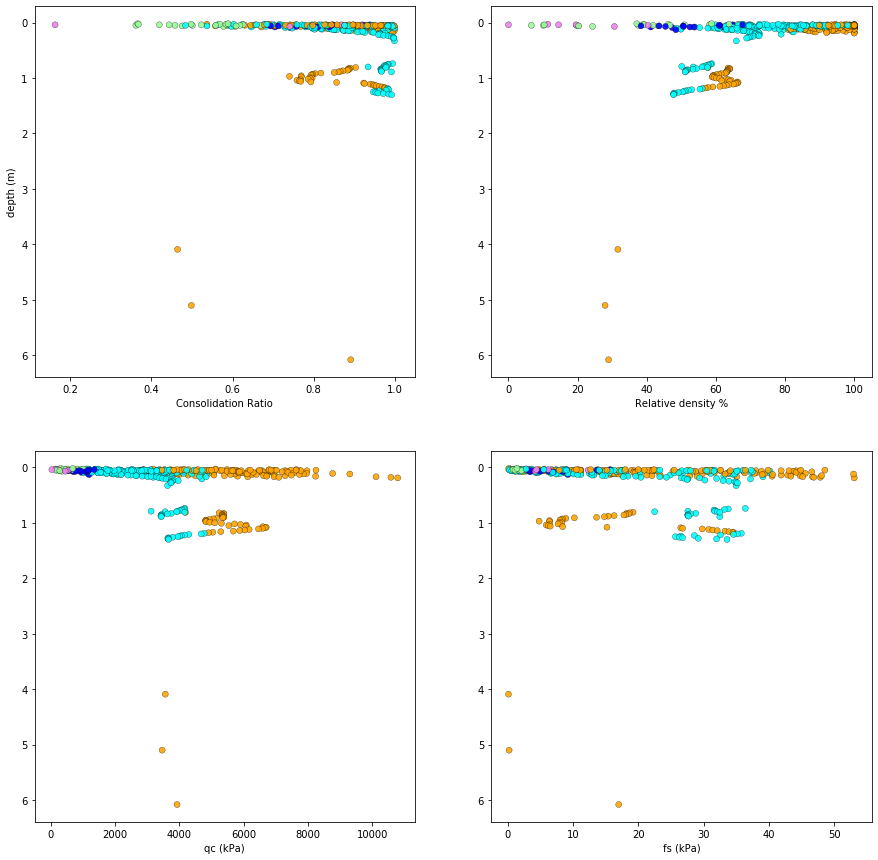

In [29]:
from pylab import *
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))

ax = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)


x1=df_uncons.consratio
x2=df_uncons.dr 
x3=df_uncons.qc_kPa 
x4=df_uncons.fs_kPa 

zs=df_uncons.depth_m
zs_sandy=df_uncons.depth_m

color_dict={1:'Palegreen',23:'Violet',4:'Blue',5:'Cyan',6:'Orange',7:'Red',
            8:'Yellow',9:'Green'}

df_uncons['colors'] = df_uncons['type'].map(lambda x: color_dict[x])

ax.scatter(x1, zs,color=df_uncons['colors'], marker='o',edgecolors='Black',alpha=0.9, linewidths=0.3)
ax2.scatter(x2, zs_sandy,color=df_uncons['colors'], marker='o',edgecolors='Black',alpha=0.9, linewidths=0.3)
ax3.scatter(x3, zs_sandy,color=df_uncons['colors'], marker='o',edgecolors='Black',alpha=0.9, linewidths=0.3)
ax4.scatter(x4, zs_sandy,color=df_uncons['colors'], marker='o',edgecolors='Black',alpha=0.9, linewidths=0.3)


ax.invert_yaxis()
ax2.invert_yaxis()
ax3.invert_yaxis()
ax4.invert_yaxis()

ax.set_xlabel('Consolidation Ratio'),ax.set_ylabel('depth (m)')
ax2.set_xlabel('Relative density %'),ax.set_ylabel('depth (m)')
ax3.set_xlabel('qc (kPa)'),ax.set_ylabel('depth (m)')
ax4.set_xlabel('fs (kPa)'),ax.set_ylabel('depth (m)')

plt.show()

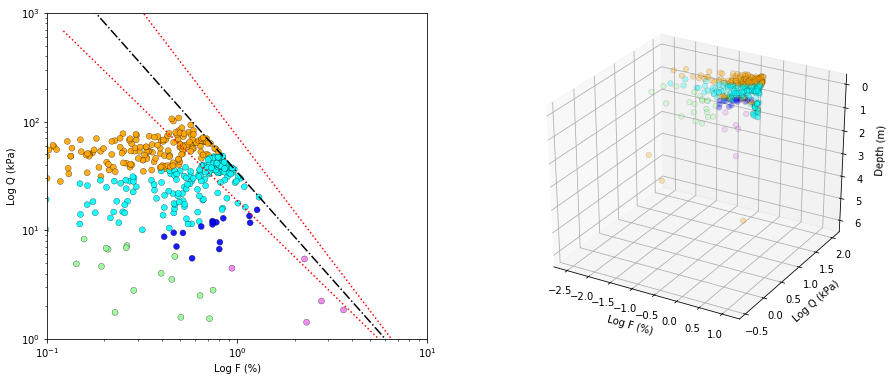

In [30]:
fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(122,projection='3d')
ax2 = fig.add_subplot(121)

dfa=df[df.depth_m>2].copy()      ###---> .copy()mi evita il warning fastidioso

xs=df_uncons.F*100   ### express in %
ys=df_uncons.Q/100   ### express in bar 
zs=df_uncons.depth_m

color_dict={1:'Palegreen',23:'Violet',4:'Blue',5:'Cyan',6:'Orange',7:'Red',
            8:'Yellow',9:'Green'}
df_uncons['colors'] = df_uncons['type'].map(lambda x: color_dict[x])

ax.scatter(np.log10(xs), np.log10(ys), zs, color=df_uncons['colors'], marker='o',edgecolors='Black',
           alpha=0.3, linewidths=0.3,s=30)
ax2.scatter(xs, ys,color=df_uncons['colors'], marker='o',edgecolors='Black',alpha=0.9, linewidths=0.3)
#   volendo aggiungi edgecolors='b'   al grafico

ax.set_xlabel('Log F (%)'),ax.set_ylabel('Log Q (kPa)'),ax.set_zlabel('Depth (m)')
ax2.set_xlabel('Log F (%)'),ax2.set_ylabel('Log Q (kPa)') 

x3 = [10.149,0.32]
x4 = [10.149,0.18]
x5 = [10.149,0.12]
y3 = [0.3556,1000]
y4 = [0.3556,1000]
y5 = [0.3556,700]

ax2.plot(x3,y3,':r')
ax2.plot(x4,y4,'-.k')
ax2.plot(x5,y5,':r')

ax.invert_zaxis()

##  settaggi che valgono solo per il grafico 2D
plt.yscale("log")
plt.xscale("log")
plt.ylim((1,1000))
plt.xlim((0.1,10))

plt.show()

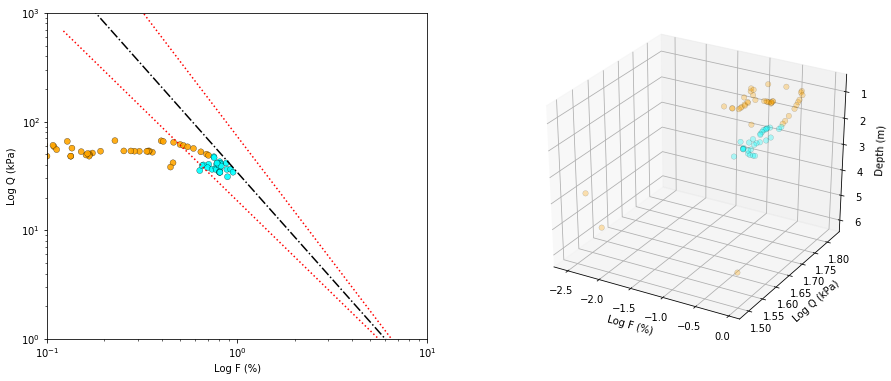

In [483]:
fig = plt.figure(figsize=(15,6))

ax = fig.add_subplot(122,projection='3d')
ax2 = fig.add_subplot(121)

dfb=df_uncons[df_uncons.depth_m>0.4].copy()  #--> .copy()mi evita il warning

xs=dfb.F*100   ### express in %
ys=dfb.Q/100   ### express in bar 
zs=dfb.depth_m

color_dict={1:'Palegreen',23:'Violet',4:'Blue',5:'Cyan',6:'Orange',7:'Red',
            8:'Yellow',9:'Green'}
dfb['colors'] = dfb['type'].map(lambda x: color_dict[x])

ax.scatter(np.log10(xs), np.log10(ys), zs, color=dfb['colors'], marker='o',edgecolors='Black',
           alpha=0.3, linewidths=0.3,s=30)
ax2.scatter(xs, ys,color=dfb['colors'], marker='o',edgecolors='Black',alpha=0.9, linewidths=0.3)
#   volendo aggiungi edgecolors='b'   al grafico

ax.set_xlabel('Log F (%)'),ax.set_ylabel('Log Q (kPa)'),ax.set_zlabel('Depth (m)')
ax2.set_xlabel('Log F (%)'),ax2.set_ylabel('Log Q (kPa)') 

x3 = [10.149,0.32]
x4 = [10.149,0.18]
x5 = [10.149,0.12]
y3 = [0.3556,1000]
y4 = [0.3556,1000]
y5 = [0.3556,700]

ax2.plot(x3,y3,':r')
ax2.plot(x4,y4,'-.k')
ax2.plot(x5,y5,':r')

ax.invert_zaxis()

##  settaggi che valgono solo per il grafico 2D
plt.yscale("log")
plt.xscale("log")
plt.ylim((1,1000))
plt.xlim((0.1,10))

plt.show()

In [31]:
df_select = df[((df.consratio<nc_limit)&(df.depth_m>0.4))].copy()
df_select['dr'] = df_uncons.apply(lambda x: _dr(x.qc_kPa,x.sv_kPa), axis=1)
df_select.iloc[:,:-2]

,depth_m,qc_kPa,fs_kPa,sv_kPa,qc_norm,Q,F,type,consratio,colors
1319,0.789999,3120.8,27.6,15.009990,3105.790009,3105.790009,0.008887,5,0.973586,Cyan
1320,0.799999,3558.3,22.5,15.199991,3543.100010,3543.100010,0.006350,5,0.934337,Cyan
1321,0.809999,4193.2,19.2,15.389990,4177.810009,4177.810009,0.004596,6,0.903644,Orange
1322,0.819999,5238.5,18.7,15.579990,5222.920009,5222.920009,0.003580,6,0.890368,Orange
1323,0.830000,5377.9,18.2,15.769991,5362.130010,5362.130010,0.003394,6,0.885913,Orange
...,...,...,...,...,...,...,...,...,...,...
25740,0.789999,3940.2,31.7,15.009990,3925.190010,3925.190010,0.008076,5,0.978353,Cyan
25741,0.799999,3913.6,32.1,15.199991,3898.400010,3898.400010,0.008234,5,0.980711,Cyan
25742,0.809999,4167.4,32.5,15.389990,4152.010009,4152.010009,0.007828,5,0.978201,Cyan
31100,6.080044,3929.5,17.0,115.520836,3813.979164,3813.979164,0.004457,6,0.891487,Orange


In [32]:
# set a filename, run the logistic model, and create the plot

save_folder = 'images/phase-animate_7'
gif_filename = '7_uncon_nclower'

working_folder = '{}/{}'.format(save_folder, gif_filename)

if not os.path.exists(working_folder):
    os.makedirs(working_folder)


fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

df_select['colors'] = df_select['type'].map(lambda x: color_dict[x])

xs=df_select.F*100   ### express in %
ys=df_select.Q/100   ### express in bar 
zs=df_select.depth_m

# load data

ax.scatter(np.log10(xs), np.log10(ys), zs, 
           color=df_select['colors'], marker='o',edgecolors='Black',
           alpha=0.3, linewidths=0.3,s=30)

ax.invert_zaxis()
ax.set_xlabel('Log F (%)'),ax.set_ylabel('Log Q (kPa)'),ax.set_zlabel('Depth (m)')

# create 360 frames for the animated gif

for azimuth in range(0, 360):
    ax.view_init(30, azimuth)
    
    # set the figure title to the viewing perspective, and save each figure as a .png
    #fig.suptitle('elev={:.1f}, angle={:.1f}, dist={:.1f}'.format(ax.view_init[0], ax.view_init[1], 50))
    plt.savefig('{}/{}/img{:03d}.png'.format(save_folder, gif_filename, azimuth))
    
# don't display the static plot...
plt.close()

# load all the static images into a list then save as an animated gif
gif_filepath = '{}/{}.gif'.format(save_folder, gif_filename)
images = [Image.open(image) for image in glob.glob('{}/*.png'.format(working_folder))]
gif = images[0]
gif.info['duration'] = 75 #milliseconds per frame
gif.info['loop'] = 0 #how many times to loop (0=infinite)
gif.save(fp=gif_filepath, format='gif', save_all=True, append_images=images[1:])
IPdisplay.Image(url=gif_filepath)

In [167]:
save_folder = 'images/phase-animate_7'
gif_filename = '7_uncon_nclower'           #is also the name of subfolder
gif_filename2 = '7_uncon_nclower_Reduc'      #name of save gif

working_folder = '{}/{}'.format(save_folder, gif_filename)
gif_filepath = '{}/{}.gif'.format(save_folder, gif_filename2)

images=[]

for image in glob.glob('{}/*.png'.format(working_folder)):
    im=Image.open(image)
    im=im.resize((im.size[0] // 2, im.size[1] // 2), Image.ANTIALIAS)
    images.append(im)
    
    
# im = Image.open("my_picture.jpg")
# im = im.resize((im.size[0] // 2, im.size[1] // 2), Image.ANTIALIAS)  # decreases width and height of the image
# im.save("out.jpg", optimize=True, quality=85)   ## optimize and quality con gif non funziona!

gif = images[0]
gif.info['duration'] = 75 #milliseconds per frame
gif.info['loop'] = 0 #how many times to loop (0=infinite)
gif.save(fp=gif_filepath, format='gif', save_all=True, append_images=images[1:])
IPdisplay.Image(url=gif_filepath)

In [33]:
df_select['cptname']=xls.iloc[df_select.index.tolist(),:].CPTname

In [34]:
df_select=pd.DataFrame(df_select)
df_select.head()

,depth_m,qc_kPa,fs_kPa,sv_kPa,qc_norm,Q,F,type,consratio,colors,constype,dr,cptname
1319,0.789999,3120.8,27.6,15.009990,3105.790009,3105.790009,0.008887,5,0.973586,Cyan,normal,50.122562,1100
1320,0.799999,3558.3,22.5,15.199991,3543.100010,3543.100010,0.006350,5,0.934337,Cyan,normal,53.469992,1100
1321,0.809999,4193.2,19.2,15.389990,4177.810009,4177.810009,0.004596,6,0.903644,Orange,under,57.703588,1100
1322,0.819999,5238.5,18.7,15.579990,5222.920009,5222.920009,0.003580,6,0.890368,Orange,under,63.504073,1100
1323,0.830000,5377.9,18.2,15.769991,5362.130010,5362.130010,0.003394,6,0.885913,Orange,under,64.045489,1100


In [35]:
namefile = 'df_select.xls'

str(dt.date.today())
nomefile= ".\\DATA\\" + (str(dt.date.today())) + namefile
export_csv = df_select.to_excel (nomefile, header=True)

In [36]:
df_select.groupby('cptname').mean()

,depth_m,qc_kPa,fs_kPa,sv_kPa,qc_norm,Q,F,type,consratio,dr
cptname,,,,,,,,,,
1100,1.044999,5073.969231,20.059615,19.854985,5054.114246,5054.114246,0.004248,5.730769,0.885196,59.105364
1520,0.859999,3508.328571,28.542857,16.339990,3491.988581,3491.988581,0.008183,5.000000,0.970436,52.110279
1580,5.100022,3465.700000,0.200000,96.900418,3368.799582,3368.799582,0.000059,6.000000,0.498411,27.941310
20,0.775000,4063.137500,32.887500,14.724992,4048.412508,4048.412508,0.008122,5.000000,0.981579,57.449640
700-2,6.080044,3929.500000,17.000000,115.520836,3813.979164,3813.979164,0.004457,6.000000,0.891487,28.952045
800-2,4.089999,3563.800000,0.100000,77.709981,3486.090019,3486.090019,0.000029,6.000000,0.464455,31.646753


In [37]:
df_select.groupby("cptname").describe(include='all')

depth_m                                                          \
          count unique top freq      mean       std       min       25%   
cptname                                                                   
1100       52.0    NaN NaN  NaN  1.044999  0.151547  0.789999  0.917499   
1520        7.0    NaN NaN  NaN  0.859999  0.021602  0.830000  0.845000   
1580        1.0    NaN NaN  NaN  5.100022       NaN  5.100022  5.100022   
20          8.0    NaN NaN  NaN  0.775000  0.024495  0.740000  0.757500   
700-2       1.0    NaN NaN  NaN  6.080044       NaN  6.080044  6.080044   
800-2       1.0    NaN NaN  NaN  4.089999       NaN  4.089999  4.089999   

                             ...     dr                                \
              50%       75%  ... unique top freq       mean       std   
cptname                      ...                                        
1100     1.044999  1.172499  ...    NaN NaN  NaN  59.105364  5.632883   
1520     0.860000  0.875000  ...    NaN NaN  NaN  52.110279  1.259221   
1580     5.100022  5.100022  ...    NaN NaN  NaN  27.941310       NaN   
20       0.775000  0.792499  ...    NaN NaN  NaN  57.449640  0.954810   
700-2    6.080044  6.080044  ...    NaN NaN  NaN  28.952045       NaN   
800-2    4.089999  4.089999  ...    NaN NaN  NaN  31.646753       NaN   

                                                                
               min        25%        50%        75%        max  
cptname                                                         
1100     47.768435  55.865199  60.967672  63.399884  66.415894  
1520     51.110334  51.281327  51.542500  52.585324  54.385818  
1580     27.941310  27.941310  27.941310  27.941310  27.941310  
20       56.020676  56.836704  57.556973  58.017158  58.787886  
700-2    28.952045  28.952045  28.952045  28.952045  28.952045  
800-2    31.646753  31.646753  31.646753  31.646753  31.646753  

[6 rows x 132 columns]

In [144]:
selectgr = df_select.groupby('cptname').agg({'type':'count','depth_m':'mean', 'qc_kPa':'mean', 'fs_kPa':'mean', 'consratio':'mean'}).rename(columns={'type':'Quantity'})
selectgr

,Quantity,depth_m,qc_kPa,fs_kPa,consratio
cptname,,,,,
1100,52,1.044999,5073.969231,20.059615,0.885196
1520,7,0.859999,3508.328571,28.542857,0.970436
1580,1,5.100022,3465.700000,0.200000,0.498411
20,8,0.775000,4063.137500,32.887500,0.981579
700-2,1,6.080044,3929.500000,17.000000,0.891487
800-2,1,4.089999,3563.800000,0.100000,0.464455


In [146]:
namefile = 'df_selectgr.xls'

str(dt.date.today())
nomefile= ".\\DATA\\" + (str(dt.date.today())) + namefile
export_csv = selectgr.to_excel (nomefile, header=True)   #<--- change dataframe name

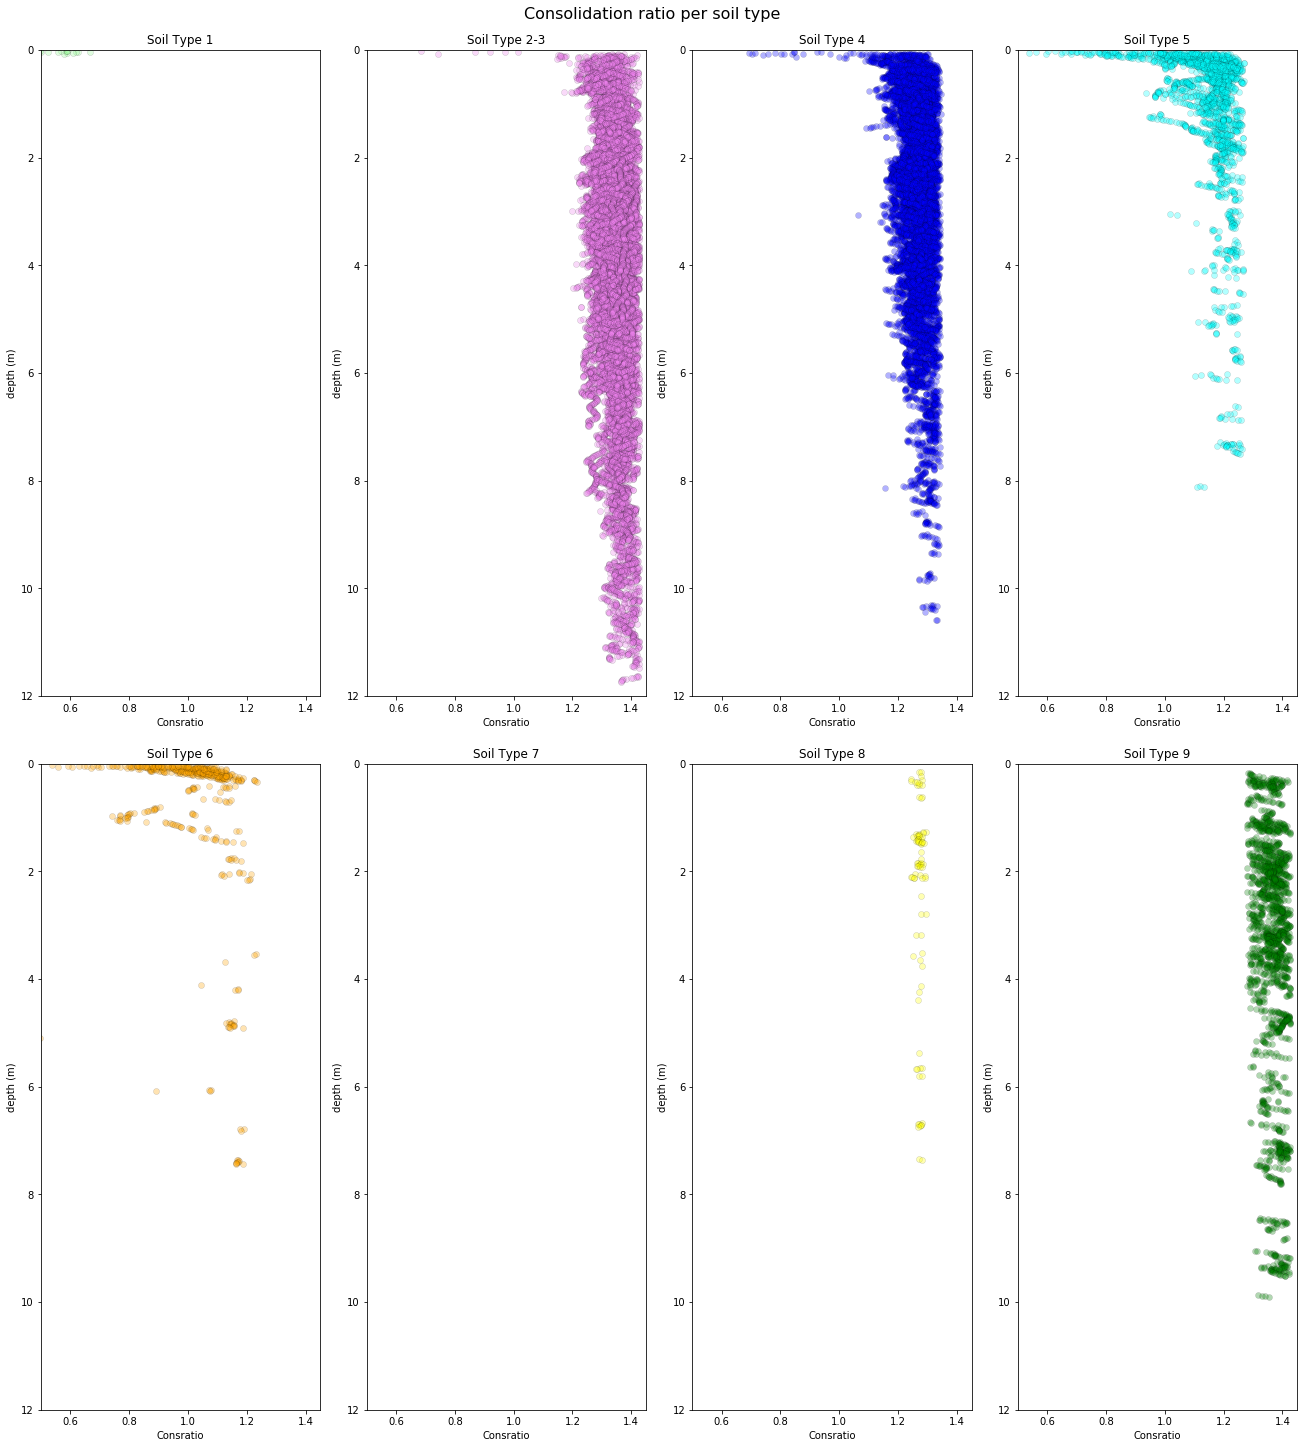

In [143]:
fig, axs = plt.subplots(2, 4, constrained_layout=True,figsize=(18,20))

list_class = [1,23,4,5,6,7,8,9]
list_color = ['Palegreen','Violet','Blue','Cyan','Orange','Red','Yellow','Green']
list_title = ['Soil Type 1','Soil Type 2-3','Soil Type 4','Soil Type 5','Soil Type 6','Soil Type 7',
              'Soil Type 8','Soil Type 9']

list_ax = []
for i in axs[0]:list_ax.append(i)
for i in axs[1]:list_ax.append(i)

for i in range(8):
    
    clr=list_color[i]
    ty=list_class[i]
    tt=list_title[i]

    x=df[df.type==ty].consratio
    y=df[df.type==ty].depth_m

    list_ax[i].scatter(x, y, c=clr,edgecolors='Black',alpha=0.3, linewidths=0.3)
    list_ax[i].set_title(tt)
    list_ax[i].invert_yaxis()
    list_ax[i].set_xlabel('Consratio')
    list_ax[i].set_ylabel('depth (m)')
    list_ax[i].set_xlim([0.5,1.45])
    list_ax[i].set_ylim([12,0])

    
fig.suptitle('Consolidation ratio per soil type', fontsize=16)

savefolder = './/images'
plt.savefig('{}//consratioperfile.png'.format(savefolder))

plt.show()





In [169]:
#lista delle coordinate xy caricate da nanocad

list_coo = [253763.61905462603,722603.5506180628,253772.88468465858,722622.8972535708,253781.26081420804,722640.9837633944,253789.77592820796,722659.061007588,
253798.44855791843,722677.5737363931,253807.12118762892,722695.2525584953,253815.12669197706,722713.2649432785,
253823.29897766578,722731.610890743,253832.13838871685,722749.4564941857,253840.7029194103,722767.8858323204,253848.89373635908,722785.9846963173,
253857.34399094878,722804.2935812616,253865.86837057874,722822.3059660449,253874.6151253295,722840.3924758686,253882.76887975816,
722858.5531107323,253891.21913434786,722876.4913704754,253899.89176405832,722894.6520053391,253908.2678936078,722912.812640203,253916.64402315722,722930.8991500267,
253925.09427774692,722949.1339099308,253933.47040729635,722967.3686698348,253941.9947869263,722985.5293046987,253949.1849158316,723004.5794400457,
253954.15129352905,723024.296700755,253957.04217009922,723044.7552118669,253957.04217009922,723064.7689727372,253955.67085685435,723084.9680462083,
253951.59397964005,723104.833556982,253945.33041373803,723124.2728488062,253937.02840922883,723142.7299838312,253926.92887249333,723160.2790871129,
253914.47586572953,723176.7348460507,253900.6824311544,723191.2571768551,253885.06675600616,723204.5008507151,253868.31449690726,723215.8172735282,
253850.45036220443,723225.1940911211,253831.2766851237,723232.4583450666,253811.5100077209,723237.6965145784,253791.7927470116,723241.2545165109,253772.0260696088,
723244.7136850563,253752.51265276025,723248.191384862,253732.69655866394,723251.6999701009,253712.88046456763,723255.066482346,253692.71845361678,723256.9196083526,
253672.03756738407,723255.585357628,253652.295598328,723251.3849386797,253632.97367116672,723244.4171848952,253615.1383628685,723234.883881106,253598.30786067157,723222.8797426418,
253584.07585294155,723208.7959849923,253571.40047105704,723192.5934866087,253561.07855920072,723175.3779460082,253550.99137663862,723157.9400302869,253543.57887261256,723138.8157698996,
253538.98312011643,723119.0614466702,253534.60974274107,723099.418311013,253530.57919367694,723079.765909702,253528.95770842125,723068.5452317326,
253528.95770842125,723059.5019768209,253530.2178341057,723039.3214346098,253531.8485849914,723019.3076737395,
253533.43300772697,722999.3000899559,253535.08846695945,722979.119547745,253536.7192178452,722959.1799119149,253538.09053109004,722939.3514636452,253539.7583444959,722919.4488903353,
253541.42615790176,722899.5463170253,253543.31634642841,722879.9217126162,253544.76178471348,722859.7967641855,253546.53498592265,722840.0887691063,253548.23330743235,722819.8927841786,
253550.42617320677,722800.41642985,253551.87161149186,722780.2914814193,253553.53942489772,722760.277720549,253555.20723830356,722740.1527721183,253556.76386414905,722720.5837614895,
253558.3760837747,722700.5422037291,253560.15508474095,722680.5284428588,253561.60052302602,722660.2923068677,253563.48144592263,722640.5611477133,253567.33594801617,722620.250886682,
253575.7862026059,722601.5713765363,253587.9427092086,722584.5967423167,253603.50896766334,722571.32836011,
253621.3731023661,722561.3956047151,253641.16448811567,722555.5397265345,253660.881748825,722552.1299746825,253681.63676009793,722550.3509737162,253701.76170852868,722553.2789128065,
253721.08363568992,722560.2960832844,253738.5400826713,722571.5507352307,253753.14271560262,722586.3757432828,253763.9004552419,722603.6564864649]

In [293]:
list_coo_x =[]
list_coo_y =[]
coo_x_zero= list_coo[0]
coo_y_zero= list_coo[1]

for i in list(range(len(list_coo))):
    if i%2==0: 
        list_coo_x.append(list_coo[i]-coo_x_zero)
    else: 
        list_coo_y.append(list_coo[i]-coo_y_zero)

In [294]:
list_sec=list(range(0,1840,20))
list_sec.append(1125)              #riga in piu aggiunta per errore per creare array della stessa len
list_sec.sort()

In [323]:
df_coo=pd.DataFrame({'cpt_sect_num':list_sec,'coo_x':list_coo_x,'coo_y':list_coo_y})
df_coo=df_coo.loc[(df_coo['cpt_sect_num']!=1125),:]  #riga in piu aggiunta per errore

In [438]:
df_merged=pd.merge(df,df_coo,on='cpt_sect_num')
# df_merged.sort_values(index, inplace=True)
df_merged.sort_index(inplace=True)
df_merged

,depth_m,qc_kPa,fs_kPa,sv_kPa,qc_norm,Q,F,type,consratio,colors,constype,cptname,cpt_sect_num,coo_x,coo_y
0,0.050000,7467.7,22.1,0.950000,7466.750000,7466.750000,0.002960,6,0.896161,Orange,under,1040,1040,-212.627678,554.389412
1,0.060000,7971.0,44.2,1.140000,7969.860000,7969.860000,0.005546,6,0.979036,Orange,normal,1040,1040,-212.627678,554.389412
2,0.070000,7448.3,88.4,1.330000,7446.970000,7446.970000,0.011871,6,1.079913,Orange,normal,1040,1040,-212.627678,554.389412
3,0.080000,7517.5,98.3,1.520000,7515.980000,7515.980000,0.013079,5,1.094711,Cyan,normal,1040,1040,-212.627678,554.389412
4,0.090000,7586.7,100.8,1.710000,7584.990000,7584.990000,0.013289,5,1.097591,Cyan,normal,1040,1040,-212.627678,554.389412
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39528,3.169997,3298.5,213.7,60.229943,3238.270057,3238.270057,0.065992,23,1.340320,Violet,over,840-3,840,-50.738590,651.515864
39529,3.179997,3317.8,125.2,60.419943,3257.380057,3257.380057,0.038436,4,1.234415,Blue,over,840-3,840,-50.738590,651.515864
39530,3.189997,3356.6,75.9,60.609943,3295.990057,3295.990057,0.023028,4,1.139265,Blue,over,840-3,840,-50.738590,651.515864
39531,3.199997,3391.4,78.9,60.799943,3330.600057,3330.600057,0.023689,4,1.145012,Blue,over,840-3,840,-50.738590,651.515864


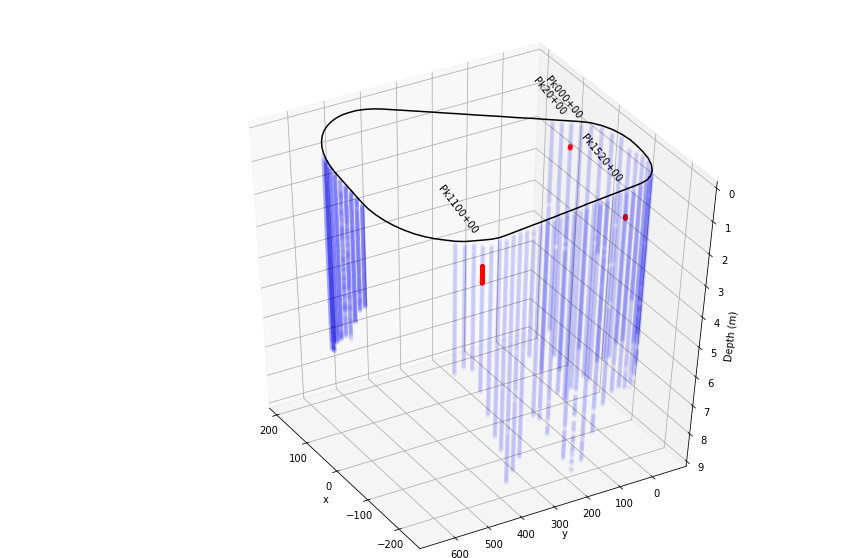

In [474]:
fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(111,projection='3d')

xs=df_merged[(df_merged.consratio>=1)].coo_x
ys=df_merged[(df_merged.consratio>=1)].coo_y
zs=df_merged[(df_merged.consratio>=1)].depth_m


ax.scatter(xs, ys, zs, color='Blue', marker='o',
        alpha=0.01,linewidths=0.3,s=20)


xs=df_merged[(df_merged.consratio<1)&(df_merged.depth_m>0.5)&(df_merged.depth_m<2)].coo_x
ys=df_merged[(df_merged.consratio<1)&(df_merged.depth_m>0.5)&(df_merged.depth_m<2)].coo_y
zs=df_merged[(df_merged.consratio<1)&(df_merged.depth_m>0.5)&(df_merged.depth_m<2)].depth_m


ax.scatter(xs, ys, zs, color='Red', marker='o',
           linewidths=0.3,s=20)

#edgecolors='Black',

ax.plot(df_coo.coo_x,df_coo.coo_y,0,c='Black')

ax.set_xlabel('x'),ax.set_ylabel('y'),ax.set_zlabel('Depth (m)')
ax.view_init(50, 150)
ax.set_zlim([0,9])
ax.invert_zaxis()
# Strech the graph
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.7, 0.7, 1.5, 1]))




########  Plotto le label sul grafico

ax.text(0,-10,0,'Pk000+00 ', size=10, zorder=2, color='k',zdir=(1,0,0),horizontalalignment='right')

sec20=df_merged[df_merged.cpt_sect_num==20].iloc[-1,:]
ax.text(sec20.coo_x,
        sec20.coo_y,
        0,
        'Pk'+sec20.cptname+'+00  ',
        size=10, zorder=2, color='k',zdir=(1,0,0),
        horizontalalignment='right',
        verticalalignment='bottom')      

sec1520=df_merged[df_merged.cpt_sect_num==1520].iloc[-1,:]
ax.text(sec1520.coo_x,
        sec1520.coo_y,
        0,
        'Pk'+sec1520.cptname+'+00  ',
        size=10, zorder=2, color='k',zdir=(1,0,0),
        horizontalalignment='right',
        verticalalignment='bottom')

sec1100=df_merged[df_merged.cpt_sect_num==1100].iloc[-1,:]
ax.text(sec1100.coo_x,
        sec1100.coo_y,
        0,
        'Pk'+sec1100.cptname+'+00  ',
        size=10, zorder=2, color='k',zdir=(1,0,0),
        horizontalalignment='right',
        verticalalignment='bottom')


plt.show()


In [485]:
# set a filename, run the logistic model, and create the plot

save_folder = 'images/phase-animate_71'
gif_filename = '71_uncon_nclower'

working_folder = '{}/{}'.format(save_folder, gif_filename)

if not os.path.exists(working_folder):
    os.makedirs(working_folder)
    


fig = plt.figure(figsize=(15,10))

ax = fig.add_subplot(111,projection='3d')

xs=df_merged[(df_merged.consratio>=1)].coo_x
ys=df_merged[(df_merged.consratio>=1)].coo_y
zs=df_merged[(df_merged.consratio>=1)].depth_m


ax.scatter(xs, ys, zs, color='Blue', marker='o',
        alpha=0.01,linewidths=0.3,s=20)


xs=df_merged[(df_merged.consratio<1)&(df_merged.depth_m>0.5)&(df_merged.depth_m<2)].coo_x
ys=df_merged[(df_merged.consratio<1)&(df_merged.depth_m>0.5)&(df_merged.depth_m<2)].coo_y
zs=df_merged[(df_merged.consratio<1)&(df_merged.depth_m>0.5)&(df_merged.depth_m<2)].depth_m


ax.scatter(xs, ys, zs, color='Red', marker='o',
           linewidths=0.3,s=20)

#edgecolors='Black',

ax.plot(df_coo.coo_x,df_coo.coo_y,0,c='Black')

ax.set_xlabel('x'),ax.set_ylabel('y'),ax.set_zlabel('Depth (m)')
ax.view_init(50, 150)
ax.set_zlim([0,9])
ax.invert_zaxis()
# Strech the graph
ax.get_proj = lambda: np.dot(Axes3D.get_proj(ax), np.diag([0.7, 0.7, 1.1, 1]))




########  Plotto le label sul grafico

ax.text(0,-10,0,'Pk000+00 ', size=10, zorder=2, color='k',zdir=(1,0,0),horizontalalignment='right')

sec20=df_merged[df_merged.cpt_sect_num==20].iloc[-1,:]
ax.text(sec20.coo_x,
        sec20.coo_y,
        0,
        'Pk'+sec20.cptname+'+00  ',
        size=10, zorder=2, color='k',zdir=(1,0,0),
        horizontalalignment='right',
        verticalalignment='bottom')      

sec1520=df_merged[df_merged.cpt_sect_num==1520].iloc[-1,:]
ax.text(sec1520.coo_x,
        sec1520.coo_y,
        0,
        'Pk'+sec1520.cptname+'+00  ',
        size=10, zorder=2, color='k',zdir=(1,0,0),
        horizontalalignment='right',
        verticalalignment='bottom')

sec1100=df_merged[df_merged.cpt_sect_num==1100].iloc[-1,:]
ax.text(sec1100.coo_x,
        sec1100.coo_y,
        0,
        'Pk'+sec1100.cptname+'+00  ',
        size=10, zorder=2, color='k',zdir=(1,0,0),
        horizontalalignment='right',
        verticalalignment='bottom')


for azimuth in range(0, 360):
    ax.view_init(30, azimuth)
    
    # set the figure title to the viewing perspective, and save each figure as a .png
    #fig.suptitle('elev={:.1f}, angle={:.1f}, dist={:.1f}'.format(ax.view_init[0], ax.view_init[1], 50))
    plt.savefig('{}/{}/img{:03d}.png'.format(save_folder, gif_filename, azimuth))
    
# don't display the static plot...
plt.close()

# create 360 frames for the animated gif




# load all the static images into a list then save as an animated gif
gif_filepath = '{}/{}.gif'.format(save_folder, gif_filename)
images = [Image.open(image) for image in glob.glob('{}/*.png'.format(working_folder))]
gif = images[0]
gif.info['duration'] = 75 #milliseconds per frame
gif.info['loop'] = 0 #how many times to loop (0=infinite)
gif.save(fp=gif_filepath, format='gif', save_all=True, append_images=images[1:])
IPdisplay.Image(url=gif_filepath)

In [486]:
save_folder = 'images/phase-animate_71'     # the folder from which take the pics
gif_filename = '71_uncon_nclower'           #is also the name of subfolder
gif_filename2 = '72_uncon_nclower_Reduc'      #name of save gif

working_folder = '{}/{}'.format(save_folder, gif_filename)
gif_filepath = '{}/{}.gif'.format(save_folder, gif_filename2)

images=[]

for image in glob.glob('{}/*.png'.format(working_folder)):
    im=Image.open(image)
    im=im.resize((im.size[0] // 2, im.size[1] // 2), Image.ANTIALIAS)
    images.append(im)
    
    
# im = Image.open("my_picture.jpg")
# im = im.resize((im.size[0] // 2, im.size[1] // 2), Image.ANTIALIAS)  # decreases width and height of the image
# im.save("out.jpg", optimize=True, quality=85)   ## optimize and quality con gif non funziona!

gif = images[0]
gif.info['duration'] = 75 #milliseconds per frame
gif.info['loop'] = 0 #how many times to loop (0=infinite)
gif.save(fp=gif_filepath, format='gif', save_all=True, append_images=images[1:])
IPdisplay.Image(url=gif_filepath)